In [1]:
#using PyPlot
#using Pipe
using Gadfly
using FreqTables
using DataFrames

In [2]:
include("src/riot.jl")
using Main.Riot

    Updating registry at `~/.julia/registries/General.toml`
┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 28, "Failed to connect to us-east.pkg.julialang.org port 443: Connection timed out", Downloads.Response("https", "https://us-east.pkg.julialang.org/registries", 301, "HTTP/2 301", ["server" => "Varnish", "retry-after" => "0", "location" => "https://us-east.pkg.julialang.org/registries", "x-geo-continent" => "NA", "x-geo-country" => "CA", "x-geo-region" => "BC", "accept-ranges" => "bytes", "date" => "Mon, 13 Jun 2022 16:29:32 GMT", "via" => "1.1 varnish", "x-served-by" => "cache-sea4478-SEA", "x-cache" => "HIT", "x-cache-hits" => "0", "x-timer" => "S1655137773.920552,VS0,VE0", "content-length" => "0"]))
└ @ Pkg.Registry /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.7/Pkg/src/Registry/Registry.jl:82
   Resolving package versions...
  No Changes to `~/.julia/enviro

In [3]:
leagues = ["challenger"]
leagues = ["challenger", "grandmaster"]
#length(map(scrape_league, leagues))

2-element Vector{String}:
 "challenger"
 "grandmaster"

In [4]:
rd = matches_df()

Main.Riot.RiotData(607×3 DataFrame
 Row │ MatchID         MatchDateTime            MatchLength 
     │ String          DateTime                 Float64     
─────┼──────────────────────────────────────────────────────
   1 │ NA1_4340985448  2022-06-13T06:10:50.520      2099.74
   2 │ NA1_4339618515  2022-06-12T09:52:02.977      2509.62
   3 │ NA1_4338358961  2022-06-11T07:56:36.481      2322.5
   4 │ NA1_4340846076  2022-06-13T04:33:15.894      2389.86
   5 │ NA1_4340111231  2022-06-12T22:24:41.356      2251.61
   6 │ NA1_4338710079  2022-06-11T17:49:41.005      2449.96
   7 │ NA1_4339362956  2022-06-12T04:55:21.910      2563.38
   8 │ NA1_4340707621  2022-06-13T03:10:19.915      2313.4
   9 │ NA1_4338020142  2022-06-11T02:56:21.893      2138.25
  10 │ NA1_4339582936  2022-06-12T08:42:24.806      2314.1
  11 │ NA1_4338457581  2022-06-11T11:15:51.067      2249.79
  ⋮  │       ⋮                    ⋮                  ⋮
 598 │ NA1_4339761628  2022-06-12T15:18:35.817      2247.11
 599 │ NA1

In [5]:
Gadfly.push_theme(:dark)
set_default_plot_size(36cm, 15cm)

function plot_freq(df::DataFrame, col::Symbol, ptitle, rev=true, limit=50)
    ft = freqtable(df, col)
    df = DataFrame(Label = names(ft)[1], Freq = ft)
    sort!(df, [:Freq], rev=rev)
    df = first(df, limit)
    p = plot(df, x=:Label, y=:Freq, Geom.bar(position=:dodge))
    title(hstack(p), ptitle)
end

win_filter = r -> 0 < r.Placement <= 3

#1 (generic function with 1 method)

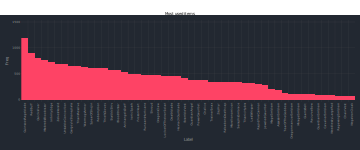

In [16]:
data = innerjoin(rd.items, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Item, "Most used items")

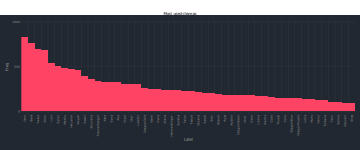

In [15]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :CharacterID, "Most used champs")

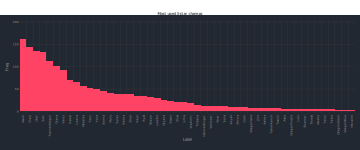

In [7]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.Tier == 3, data)

plot_freq(data, :CharacterID, "Most used 3 star champs")

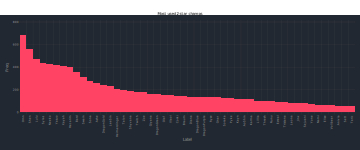

In [8]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.Tier == 2, data)

plot_freq(data, :CharacterID, "Most used 2 star champs")

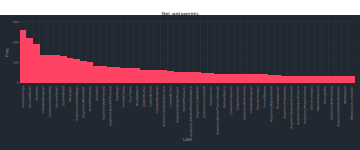

In [9]:
data = innerjoin(rd.augments, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Augment, "Most used augments")

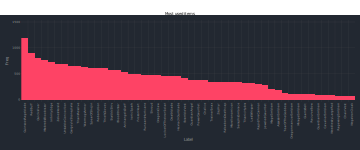

In [10]:
data = innerjoin(rd.items, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Item, "Most used items")

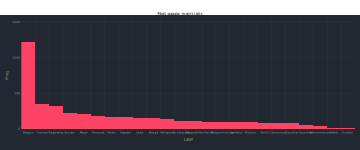

In [11]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierCurrent >= r.TierTotal/2 && r.TierTotal > 1, data)

plot_freq(data, :Trait, "Most popular main traits")

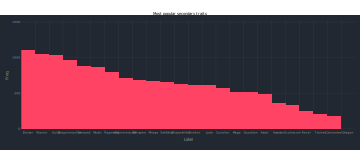

In [12]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierCurrent < r.TierTotal/2 && r.TierTotal > 1, data)

plot_freq(data, :Trait, "Most popular secondary traits")

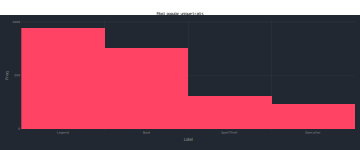

In [13]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierTotal == 1 , data)

plot_freq(data, :Trait, "Most popular unique traits")